**Problem : 1**

In [70]:
import numpy as np
import networkx as nx
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power 
from scipy.linalg import fractional_matrix_power 
from sklearn.semi_supervised import LabelSpreading

In the given question we are given with the graph, In which we can represent the graph by adjacency matrix (or) adjacencey list, So for our conivence we can adjacency matrix, to representh the given graph.

In [71]:
admatrix=np.array([[0,1,0,0,1,1], [1,0,1,1,0,0], [0,1,0,1,0,0], [0,1,1,0,0,0], [1,0,0,0,0,0],[1,0,0,0,0,0]])
print('The adjacency matrix reprsenation of graph is \n',admatrix)

The adjacency matrix reprsenation of graph is 
 [[0 1 0 0 1 1]
 [1 0 1 1 0 0]
 [0 1 0 1 0 0]
 [0 1 1 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]]


1.1)Now, We write down the initial label vector P0 for this graph
where v6 has observed label 1 and v4 and v5 have observed label 2.

In [72]:
Ilabels = np.array([0,0,0,-1,-1,1])
Ilabels=Ilabels.T
print('Initial Labesl are',Ilabels)

Initial Labesl are [ 0  0  0 -1 -1  1]


Below, we had performed methods to draw the graph, which can be know by its colours, which help us determine the labelled(1,2) and unlabelled nodes.

In [78]:
def labeldrawing(numberofnodes,numberofiterations):
  conodes = []
  nod=[i for i in range(1,numberofnodes)] 
  graph = nx.DiGraph()
  for i in nod:
   if(numberofiterations[i-1]==1): 
     conodes.append("green") 
     continue
   elif(numberofiterations[i-1] == -1): 
    conodes.append("red") 
    continue
   conodes.append("yellow") 
  for i in range(1,7):
     for j in range(i,7):
        if admatrix[i-1][j-1] == 1:
            graph.add_edge(i,j) 
  nx.draw(graph,with_labels=True,nodelist=nod,node_color=conodes)
  plt.title('The graphical represenation of Labels:') 
  plt.show()

Now, Below code is used to create a sum of diagonal elements of the adjacency matrix which is stored in a variable diag, Then now we can use this digonal marix to create a smilarity matrix Dash. By the smilarity matrix, we can use matrix to obatains the labels in different iterations.

In [74]:
diag = np.matrix(np.diag(np.sum(np.array(admatrix),axis=0)))
Dash= sqrtm(np.linalg.matrix_power(diag,-1)) @ admatrix @ sqrtm(np.linalg.matrix_power(diag,-1))
print(Dash)

[[0.         0.33333333 0.         0.         0.57735027 0.57735027]
 [0.33333333 0.         0.40824829 0.40824829 0.         0.        ]
 [0.         0.40824829 0.         0.5        0.         0.        ]
 [0.         0.40824829 0.5        0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.        ]]


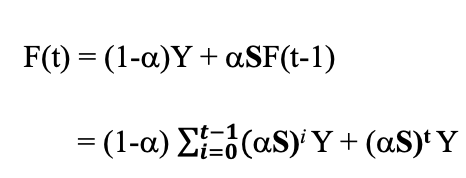



From the above formula we know that, for t-th iteration we are using the above formula, we can use the same formula for iterations and iterations, Based on the formula, code is developed which is known as the labelpropagation. 

And we had used the Labelsprinting code to divide the labels based on F(t) which is Finallabel. By which Labelspriniting we are seperating the unlabeled nodes v1, v2, and v3 to get the node labels.

In [75]:
def Labelpropagation(admatrix,Ilabels,alpha=0.8, iterations=20):
  r = 0
  for i in range(iterations):
    midl = alpha*admatrix
    r += np.linalg.matrix_power(midl,i) @ Ilabels  
  midl = alpha*admatrix
  Finallabel = (1-alpha)*r + np.linalg.matrix_power(midl,iterations) @ Ilabels
  return Finallabel

def Labelsprinting(Finallabel):
  Ilabelling = ['' for _ in range(Finallabel.shape[0])]
  for i in range(Finallabel.shape[0]):
    if Finallabel[i] > 0:
      Ilabelling[i] = "1 Labelling"
    elif Finallabel[i] < 0:
      Ilabelling[i] = "2 Labelling"
    else:
      Ilabelling[i] = "Zero Labelling"
  return Ilabelling

From the below code, we are just printing the label nodes for the Node v1,v2,v3.

In [54]:
def printLabel(Ilabelling):
  print("Node Lable v1:",(Ilabelling[0]))
  print("Node Lable v2:",Ilabelling[1])
  print("Node Label v3:",Ilabelling[2])

1.2)Perform 1 iteration of the label spreading algorithm with the decay parameter α = 0.8 and
determine the node labels for the unlabeled nodes v1, v2, and v3, i.e., compute P1 and provide the labels
l1, l2, and l3 after 1 iteration

Below, we are calling the Labelpropagation algortithm for iteration 1, and decay value(alpha = 0.8)

In [76]:
Finallabel = Labelpropagation(Dash,Ilabels,0.8,1)
print('The Label values are : \n',Finallabel)
print(' ')
Ilabelling1 = Labelsprinting(Finallabel)
print('The Labellinsg are :\n',Ilabelling1)
print(' ')
printLabel(Ilabelling1)

The Label values are : 
 [ 0.         -0.32659863 -0.4        -0.2        -0.2         0.2       ]
 
The Labellinsg are :
 ['Zero Labelling', '2 Labelling', '2 Labelling', '2 Labelling', '2 Labelling', '1 Labelling']
 
Node Lable v1: Zero Labelling
Node Lable v2: 2 Labelling
Node Label v3: 2 Labelling


with the help of Labeldrawing, we had created a graph with the node labels for iteration 1.

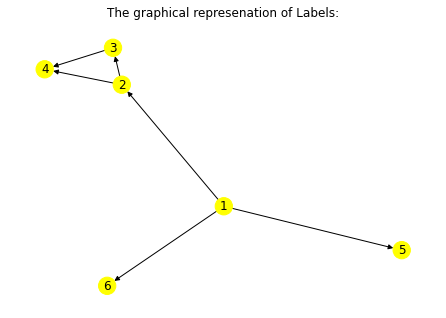

In [79]:
labeldrawing(7,Labelpropagation(Dash,Ilabels,0.8,1))

1.3)Perform 2 iterations of the label spreading algorithm with the decay parameter α = 0.8 and
determine the node labels for the unlabeled nodes v1, v2, and v3, i.e., compute P2 and provide the labels
l1, l2, and l3 after 2 iterations

Below, we are calling the Labelpropagation algortithm for iteration 2, and decay value(alpha = 0.8)

In [57]:
Finallabel = Labelpropagation(Dash,Ilabels,0.8,2)
print('The Label values are : \n',Finallabel)
print(' ')
Ilabelling2 = Labelsprinting(Finallabel)
print('The Labellinsg are :\n',Ilabelling2)
print(' ')
printLabel(Ilabelling2)

The Label values are : 
 [-0.08709297 -0.19595918 -0.18666667 -0.46666667 -0.2         0.2       ]
 
The Labellinsg are :
 ['2 Labelling', '2 Labelling', '2 Labelling', '2 Labelling', '2 Labelling', '1 Labelling']
 
Node Lable v1: 2 Labelling
Node Lable v2: 2 Labelling
Node Label v3: 2 Labelling


with the help of Labeldrawing, we had created a graph with the node labels for iteration 1.

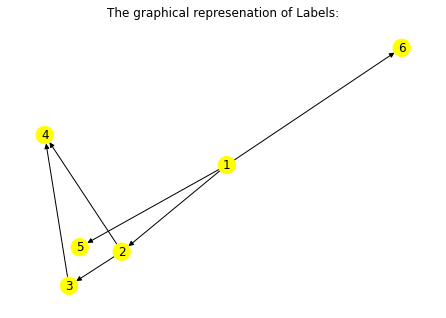

In [58]:
labeldrawing(7,Labelpropagation(Dash,Ilabels,0.8,2))

1.4)Perform infinite iterations of the label spreading algorithm with the decay parameter α = 0.8
and determine the node labels for the unlabeled nodes v1, v2, and v3, i.e., compute P∞ and provide the
labels l1, l2, and l3 after infinite iterations.

Below, we are calling the Labelpropagation algortithm for infinity iterations, and decay value(alpha = 0.8)

In [45]:
Finallabel = Labelpropagation(Dash,Ilabels,0.8,1000000)
print('The Label values are : \n',Finallabel)
print(' ')
Ilabellinginfi = Labelsprinting(Finallabel)
print('The Labellinsg are :\n',Ilabellinginfi)
print(' ')
printLabel(Ilabellinginfi)

The Label values are : 
 [-0.0972985  -0.20919178 -0.20910767 -0.35196482 -0.24494025  0.15505975]
 
The Labellinsg are :
 ['2 Labelling', '2 Labelling', '2 Labelling', '2 Labelling', '2 Labelling', '1 Labelling']
 
Node Lable v1: 2 Labelling
Node Lable v2: 2 Labelling
Node Label v3: 2 Labelling


with the help of Labeldrawing, we had created a graph with the node labels for infinity iterations.

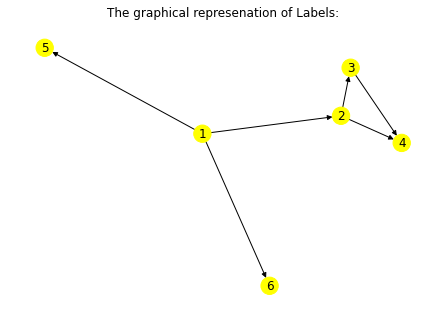

In [170]:
labeldrawing(7,Labelpropagation(Dash,Ilabels,0.8,1000000))

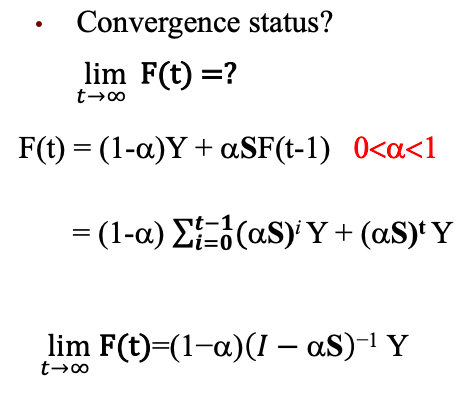

From the above formula, we can use this to find the convergergnce, which will defines us that, result won't be change after the converegnce, By that we can say that , as we increase the iterations, upto certain iterations results will change. After that there will be no change in the results. There won't be new results at inifity as because it attains the convergence before the inifinity iterations.

Then, from the below code we observed that we create a identity matrix from the smiliarity matrix. Then By the formula, we can create infinity iterations. And by the end of we can find the convergence status, which is given below as the Infinity iteration.

In [59]:
Iden = np.identity(Dash.shape[0])
print(Iden)
print(' ')
IlabellingInfinity=np.linalg.matrix_power((Iden-0.8*Dash),-1)
print(IlabellingInfinity)
InfinityIterations=(1-0.8)*IlabellingInfinity @ Ilabels
print(' ')
print('The Convergence status: \n',InfinityIterations)



[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
 
[[2.15988083 0.89374379 0.4864925  0.4864925  0.99760622 0.99760622]
 [0.89374379 1.92154916 1.04595888 1.04595888 0.41280258 0.41280258]
 [0.4864925  1.04595888 1.75982409 1.04553837 0.22470126 0.22470126]
 [0.4864925  1.04595888 1.04553837 1.75982409 0.22470126 0.22470126]
 [0.99760622 0.41280258 0.22470126 0.22470126 1.46077458 0.46077458]
 [0.99760622 0.41280258 0.22470126 0.22470126 0.46077458 1.46077458]]
 
The Convergence status: 
 [-0.0972985  -0.20919178 -0.20910767 -0.35196482 -0.24494025  0.15505975]


1.5)Determine the node labels for the unlabeled nodes v1, v2, and v3 via the energy minimization
algorithm.

In [68]:
submat = diag - admatrix
print("The sub mat from the smilairity and adjancey matrix \n",submat)
print(' ')
valuematrix=np.linalg.eig(submat)
vectormatrix = np.linalg.eig(submat)
print('The value of the matrix is \n',valuematrix)
print(' ')
print('The vcetor of the matrix \n',vectormatrix)

The sub mat from the smilairity and adjancey matrix 
 [[ 3 -1  0  0 -1 -1]
 [-1  3 -1 -1  0  0]
 [ 0 -1  2 -1  0  0]
 [ 0 -1 -1  2  0  0]
 [-1  0  0  0  1  0]
 [-1  0  0  0  0  1]]
 
The value of the matrix is 
 (array([ 4.56155281e+00, -3.83434365e-16,  4.38447187e-01,  3.00000000e+00,
        3.00000000e+00,  1.00000000e+00]), matrix([[-6.57192300e-01,  4.08248290e-01, -2.60956474e-01,
         -5.77350269e-01,  3.13803683e-01, -6.49161918e-18],
        [ 6.57192300e-01,  4.08248290e-01,  2.60956474e-01,
         -5.77350269e-01,  3.13803683e-01,  3.09798041e-16],
        [-1.84524092e-01,  4.08248290e-01,  4.64705132e-01,
          2.88675135e-01, -7.50442803e-01,  1.65886237e-16],
        [-1.84524092e-01,  4.08248290e-01,  4.64705132e-01,
          2.88675135e-01,  4.36639120e-01,  2.75309490e-16],
        [ 1.84524092e-01,  4.08248290e-01, -4.64705132e-01,
          2.88675135e-01, -1.56901841e-01, -7.07106781e-01],
        [ 1.84524092e-01,  4.08248290e-01, -4.64705132e-01,
    

For this we can think about the label spreading in the energy mimization way.

In [69]:
index=0
unlabelsindex = [0,1,2]
initals= np.array([-1,-1,-1,0,0,1])
energymin = LabelSpreading(gamma=0.75, max_iter=30)
energymin.fit(admatrix, initals)
estimatedl = energymin.transduction_[unlabelsindex]
for i in unlabelsindex:
    initals[i] = estimatedl[index]
    index=index+1
print('The labels are :\n',initals)

The labels are :
 [0 0 0 0 0 1]


From the above results,we had determine the node labels for the unlabeled nodes v1, v2, and v3 via the energy minimization algorithm.